In [1]:
import cv2
import numpy as np
import csv
import threading
from matplotlib import pyplot as plt
from keyboard import is_pressed
import csv
import os.path

faces found:  1


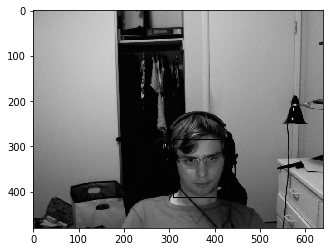

In [2]:
# initialize cascada classifier
haar_cascade = cv2.CascadeClassifier(
    'data/haarcascade_frontalface_alt.xml')

#initialize default. Change int argument to change webcam used.
cam = cv2.VideoCapture(0)

#read img from camera and make a gray version for the cascada classifier
ret_val, img = cam.read()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#use the classifier to detect faces. Returns face box coordinates for each face
faces = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
print("faces found: ", len(faces))

#for each face, draw a rectangle around it
for (x, y, w, h) in faces:     
         cv2.rectangle(gray, (x, y), (x+w, y+h), (0, 255, 0), 2)

# display the img
plt.imshow(gray,cmap="gray")

In [8]:
def label(savepath,smoothCapture=False):
    csvFileWriter = None
    csvFile = None
    
    num = 0
    if os.path.isfile(savepath + "/faceLabels.csv"):
        with  open(savepath + '/faceLabels.csv', 'r') as file:
            l = list(csv.reader(file))
            num = int(l[-2][0][4:-4]) +1
        csvFile = open(savepath + '/faceLabels.csv', 'a')
            
    else:
        csvFile = open(savepath + '/faceLabels.csv', 'w')
        
    csvFileWriter = csv.writer(csvFile, delimiter=',',
                        quotechar='|', quoting=csv.QUOTE_MINIMAL,lineterminator='\n')
        
        
    cam = cv2.VideoCapture(smoothCapture)
    lastlabel = "Neutral"
    numImages = [0,0,0,0] 
    lastlabelidx = 0
    
    while True:
        key = cv2.waitKeyEx(False)
        ret_val, img = cam.read()
        img = cv2.flip(img,1)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
        faceimg = None
        if len(faces) == 1:
            x,y,w,h = faces[0]
            wasSaved = ""
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            faceimg = gray[y:y+h,x:x+w]
            if key == 2424832:
                lastlabel = "Neutral"
                lastlabelidx = 0
            elif key == 2490368:
                lastlabel = "Happy"
                lastlabelidx = 1
            elif key == 2621440:
                lastlabel = "Sad"
                lastlabelidx = 2
            elif key == 2555904:
                lastlabel = "Angry"
                lastlabelidx = 3
            elif key == ord(' ') and lastlabelidx is not None:
                numImages[lastlabelidx] += 1
                imgName = "face"+str(num)+'.png'
                cv2.imwrite(savepath + "/" + imgName,faceimg)
                wasSaved = "SAVED"
                csvFileWriter.writerow([imgName,lastlabel])
                num += 1
            
                
            cv2.putText(img,lastlabel + "  {}".format(str(numImages)) + wasSaved,
                        (x,y-5),cv2.FONT_HERSHEY_SIMPLEX,.5,(0,255,0))
            
        cv2.imshow('my webcam', img)
        
        
        if key == 27: 
            break  # esc to quit
    cv2.destroyAllWindows()

In [10]:
label("data")

this	 testsdsdf


In [2]:
import csv
 
with open('persons.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['Name', 'Profession'])
    filewriter.writerow(['Derek', 'Software Developer'])
    filewriter.writerow(['Steve', 'Software Developer'])
    filewriter.writerow(['Paul', 'Manager'])